   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.7 MB/s eta 0:00:00
Mounted at /content/drive
🔍 Analisando e carregando dataset de frutas...
📌 Formatos suportados: .jpg, .jpeg, .png

📁 maca:
✅ 2

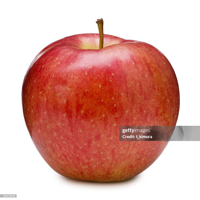


📁 banana:
✅ 23 amostras de imagens extraídas do dataset


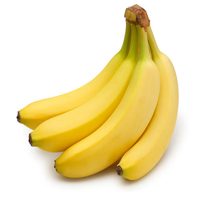


📁 uva:
✅ 21 amostras de imagens extraídas do dataset


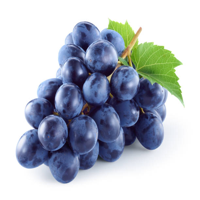


📁 limao:
✅ 23 amostras de imagens extraídas do dataset


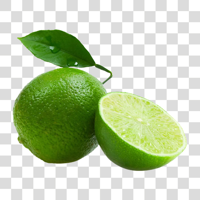

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 239MB/s]



🎯 Iniciando processo de treinamento do modelo de aprendizado, fundamentado nos rótulos e imagens presentes no dataset....


epoch,train_loss,valid_loss,error_rate,time
0,1.683021,0.116238,0.000000,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.461332,0.127626,0.058824,00:17
1,0.360613,0.094072,0.058824,00:17
2,0.289247,0.078598,0.058824,00:17
3,0.224433,0.069589,0.058824,00:16
4,0.197916,0.042830,0.000000,00:17
5,0.198202,0.041927,0.000000,00:17
6,0.180084,0.031633,0.000000,00:16
7,0.152499,0.028524,0.000000,00:17
8,0.130869,0.018039,0.000000,00:18
9,0.110527,0.022254,0.000000,00:20



✅ Classificação concluída com sucesso!


In [1]:
# ========== INSTALAÇÃO E IMPORTAÇÕES ==========
!pip install --upgrade pillow scikit-image --quiet
!pip install fastai ipywidgets --quiet #biblioteca de deep learning que simplifica o treinamento de modelos

from fastai.vision.all import *
from pathlib import Path
from google.colab import drive
from ipywidgets import widgets
from IPython.display import display, clear_output
import PIL #Biblioteca para manipulação de imagens em Python
from PIL import Image, ImageFile
import warnings

# Configurações para evitar erros
ImageFile.LOAD_TRUNCATED_IMAGES = True
warnings.filterwarnings('ignore', category=UserWarning)

# ========== CONEXÃO COM GOOGLE DRIVE ==========
drive.mount('/content/drive')

# ========== CONFIGURAÇÃO DO DATASET ==========
path = Path('/content/drive/MyDrive/frutas_dataset')
# Formatos suportados (apenas JPG e PNG)
FORMATOS_SUPORTADOS = ['.jpg', '.jpeg', '.png']

# Função otimizada para verificar imagens
# Função responsável por validar se um arquivo é uma imagem, verificando sua extensão e tentando realizar a abertura do arquivo
def verificar_imagem(img_path):
    try:
        if img_path.suffix.lower() not in FORMATOS_SUPORTADOS:
            return False
        with Image.open(img_path) as img:
            img.verify()
            return True
    except Exception as e:
        return False

# Processamento do dataset com relatório detalhado
#Verifica a qualidade do dataset, se esta tudo certo para rodar
print("🔍 Analisando e carregando dataset de frutas...")
print(f"📌 Formatos suportados: {', '.join(FORMATOS_SUPORTADOS)}")

for folder in path.ls():
    if folder.is_dir():
        validas, invalidas = [], []
        for ext in FORMATOS_SUPORTADOS:
            for img_path in folder.glob(f'*{ext}'):
                if verificar_imagem(img_path):
                    validas.append(img_path)
                else:
                    invalidas.append(img_path.name)

        print(f"\n📁 {folder.name}:")
        print(f"✅ {len(validas)} amostras de imagens extraídas do dataset")
        if invalidas:
            print(f"❌ {len(invalidas)} arquivos problemáticos")
            print(f"   Exemplos: {', '.join(invalidas[:3])}" +
                 ("..." if len(invalidas) > 3 else ""))

        if validas:
            img = PILImage.create(validas[0]).resize((200, 200))
            display(img)

# ========== CRIAÇÃO DO MODELO ==========
#Aqui, de fato, os dados são preparados para o treinamento.
#learn - modelo é criado e treinado.
#resnet18: arquitetura da rede neural pré-treinada.
#fine_tune(10): realiza o treinamento do modelo em ciclos
#error_rate: calcula a taxa de erro do modelo.

try:
    dls = ImageDataLoaders.from_folder(
        path,
        train=".",
        valid_pct=0.2,
        item_tfms=Resize(460),
        batch_tfms=aug_transforms(size=224),
        bs=8,
        extensions=FORMATOS_SUPORTADOS
    )

    learn = vision_learner(dls, resnet18, metrics=error_rate)
    print("\n🎯 Iniciando processo de treinamento do modelo de aprendizado, fundamentado nos rótulos e imagens presentes no dataset....")
    learn.fine_tune(10)

except Exception as e:
    print(f"\n❌ Erro ao criar modelo: {str(e)}")
    raise

# ========== DICIONÁRIO DE INFORMAÇÕES NUTRICIONAIS ==========
# Informa a tabela nutricional de acordo com a fruta classificada
info_frutas = {
    "maca": "🍎 A maçã é rica em vitaminas do complexo B (B1, B2, B6), vitamina C e antioxidantes.",
    "banana": "🍌 A banana é uma excelente fonte de potássio, vitamina B6 e vitamina C.",
    "uva": "🍇 A uva contém vitamina C, vitamina K e antioxidantes como o resveratrol.",
    "limao": "🍋 O limão é extremamente rico em vitamina C e também contém vitaminas do complexo B."
}

# ========== INTERFACE DE TESTE ==========
out = widgets.Output()

def processar_upload(change):
    with out:
        clear_output()
        if change['new']:
            try:
                # Carrega e exibe a imagem
                img = PILImage.create(change['owner'].data[0])
                display(img.resize((300, 300)))
                # Predição
                pred, _, prob = learn.predict(img)
                confianca = prob.max().item() * 100
                # Exibe resultados
                print("🔬 Resultado da Análise:")
                print(f"🍓 Fruta: {pred}")
                print(f"📈 Confiança: {confianca:.1f}%")

                # Dicas visuais
                if confianca > 90:
                    print("✅ Confiança excelente: A identificação foi feita com alta precisão. Pode confiar no resultado!")
                elif confianca > 70:
                    print("🔎 Resultado provável. Considere verificar com outra imagem para maior precisão.")
                else:
                    print("⚠️ Confiança baixa: Tente uma imagem mais nítida ou com melhor iluminação.")

                # Informação nutricional baseada na fruta
                fruta_detectada = str(pred).lower()
                if fruta_detectada in info_frutas:
                    print("\n🧪 Informação nutricional:")
                    print(info_frutas[fruta_detectada])
                else:
                    print("\nℹ️ Informação nutricional não encontrada para esta fruta.")

            except PIL.UnidentifiedImageError:
                print("🚫 Formato não suportado. Use JPG ou PNG.")
            except Exception as e:
                print(f"⚠️ Erro: {str(e)}")

# Configuração do widget de upload
uploader = widgets.FileUpload(
    description='Selecionar',
    multiple=False
)
uploader.observe(processar_upload, names='data')

# Exibição da interface
display(widgets.VBox([
    widgets.HTML("<h3 style='color:white'>🍉 Classificador de Frutas 🍌</h3>"),
    widgets.Label("Envie uma foto de fruta para análise:"),
    uploader,
    out
]))

print("\n✅ Classificação concluída com sucesso!")